In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Install TensorBoard if not already available
!pip install -q tensorboard


In [7]:
# 2) Helper: average of last 10 validation-loss scalars
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np

def avg_std_last_10_val_loss(event_file: str, fallback_tag: str | None = None) -> float:
    """
    Returns the average of the last 10 validation-loss scalar values
    contained in `event_file`.  If auto-detection of the tag fails,
    supply `fallback_tag` (e.g., 'val_loss').
    """
    acc = EventAccumulator(event_file)
    acc.Reload()

    # ---- find the validation-loss tag ----
    val_tag = None
    for tag in acc.Tags().get("scalars", []):
        tag_l = tag.lower()
        if "val" in tag_l and "loss" in tag_l:
            val_tag = tag
            break
    if val_tag is None:
        if fallback_tag:
            val_tag = fallback_tag
        else:
            raise ValueError(
                f"Couldn’t auto-detect a validation-loss tag in {event_file}. "
                "Pass fallback_tag explicitly."
            )

    # ---- pull the loss values & average the last 10 ----
    losses = [ev.value for ev in acc.Scalars(val_tag)]
    if len(losses) == 0:
        raise RuntimeError(f"No scalar data under tag '{val_tag}' in {event_file}")
    return float(np.mean(losses[-10:])), float(np.std(losses[-10:]))


In [5]:
# 3)  Map learning-rate ➜ .tfevents path
events_files = {
    2e-2: "/content/drive/MyDrive/CS_4701/peter_new/peter_new/lightning_logs/version_4/events.out.tfevents.1747321848.355f4e9696ca.4571.0",
    2e-3: "/content/drive/MyDrive/CS_4701/peter_new/peter_new/lightning_logs/version_5/events.out.tfevents.1747324697.355f4e9696ca.18393.0",
    2e-4: "/content/drive/MyDrive/CS_4701/peter_new/peter_new/lightning_logs/version_2/events.out.tfevents.1746816109.b1ee57905eda.2630.0",
    2e-5: "/content/drive/MyDrive/CS_4701/peter_new/peter_new/lightning_logs/version_6/events.out.tfevents.1747327153.355f4e9696ca.30575.0",
}

In [8]:
# 4)  Compute averages
lr_vals, avg_losses, std_losses = [], [], []
for lr, path in events_files.items():
    print(f"Processing lr={lr:g} …")
    avg, std = avg_std_last_10_val_loss(path, fallback_tag=None)  # set fallback_tag if needed
    lr_vals.append(lr)
    avg_losses.append(avg)
    std_losses.append(std)
    print(f"  ⮡ avg(last 10 val-loss) = {avg:.4f}")

# Optional:  nice little table
import pandas as pd, textwrap, pprint, json, math, os, sys, itertools, collections
df = pd.DataFrame({"learning_rate": lr_vals, "avg_val_loss": avg_losses, "std_val_loss": std_losses})
display(df)

Processing lr=0.02 …
  ⮡ avg(last 10 val-loss) = 45.8964
Processing lr=0.002 …
  ⮡ avg(last 10 val-loss) = 45.6981
Processing lr=0.0002 …
  ⮡ avg(last 10 val-loss) = 49.6203
Processing lr=2e-05 …
  ⮡ avg(last 10 val-loss) = 45.8090


,learning_rate,avg_val_loss,std_val_loss
0,0.02000,45.896367,3.863494
1,0.00200,45.698124,3.470638
2,0.00020,49.620271,13.147330
3,0.00002,45.808984,4.492678


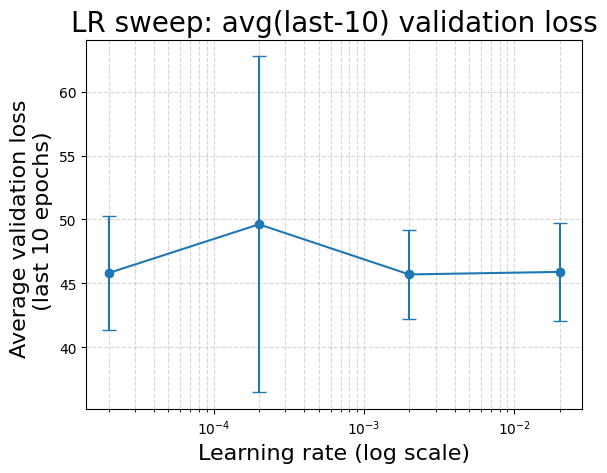

In [24]:
# 5)  Plot: learning-rate vs average val-loss
import matplotlib.pyplot as plt

plt.figure()
plt.errorbar(lr_vals, avg_losses, std_losses, capsize=5, marker="o")
plt.xscale("log")           # log scale often makes lrs easier to view
plt.xlabel("Learning rate (log scale)", fontsize=16)
plt.ylabel("Average validation loss \n (last 10 epochs)", fontsize=16)
plt.title("LR sweep: avg(last-10) validation loss", fontsize=20)
plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.show()
# plt.savefig('LR.png',bbox_inches='tight')

In [29]:
events_files_epochs = {
    135: "/content/drive/MyDrive/CS_4701/peter_epochs_135/peter_epochs_135/lightning_logs/version_0/events.out.tfevents.1747363838.8ad702ddf340.2454.0",
    235: "/content/drive/MyDrive/CS_4701/peter_epochs_235/peter_epochs_235/lightning_logs/version_0/events.out.tfevents.1747365606.8ad702ddf340.10895.0",
    335: "/content/drive/MyDrive/CS_4701/peter_epochs_335/peter_epochs_335/lightning_logs/version_0/events.out.tfevents.1747449073.08f72eda48d0.4337.0",
    435: "/content/drive/MyDrive/CS_4701/peter_epochs_435/peter_epochs_435/lightning_logs/version_0/events.out.tfevents.1747453326.08f72eda48d0.24550.0",
    535: "/content/drive/MyDrive/CS_4701/peter_epochs_535/peter_epochs_535/lightning_logs/version_0/events.out.tfevents.1747374591.6611394a95a3.3034.0",
}

In [30]:
ep_vals, avg_losses, std_losses = [], [], []
for ep, path in events_files_epochs.items():
    print(f"Processing lr={ep:g} …")
    avg, std = avg_std_last_10_val_loss(path, fallback_tag=None)  # set fallback_tag if needed
    ep_vals.append(ep)
    avg_losses.append(avg)
    std_losses.append(std)
    print(f"  ⮡ avg(last 10 val-loss) = {avg:.4f}")

# Optional:  nice little table
import pandas as pd, textwrap, pprint, json, math, os, sys, itertools, collections
df = pd.DataFrame({"epochs": ep_vals, "avg_val_loss": avg_losses, "std_val_loss": std_losses})
display(df)

Processing lr=135 …
  ⮡ avg(last 10 val-loss) = 44.9769
Processing lr=235 …
  ⮡ avg(last 10 val-loss) = 49.1703
Processing lr=335 …
  ⮡ avg(last 10 val-loss) = 32.0476
Processing lr=435 …
  ⮡ avg(last 10 val-loss) = 53.9016
Processing lr=535 …
  ⮡ avg(last 10 val-loss) = 45.0731


,epochs,avg_val_loss,std_val_loss
0,135,44.976945,5.404496
1,235,49.170318,2.494196
2,335,32.047579,6.044909
3,435,53.901567,11.214484
4,535,45.073143,3.236728


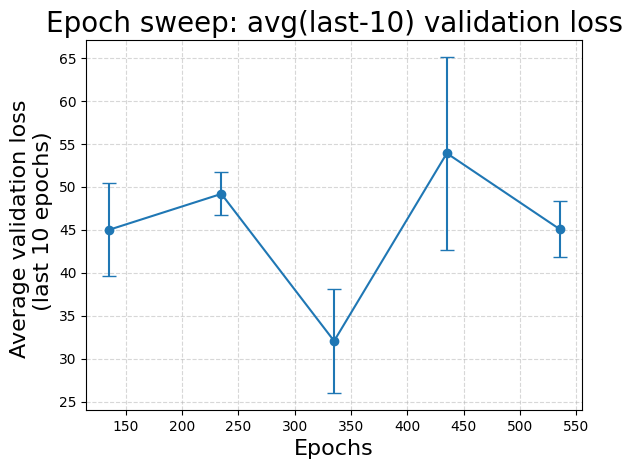

In [33]:
plt.figure()
plt.errorbar(ep_vals, avg_losses, std_losses, capsize=5, marker="o")
# plt.xscale("log")           # log scale often makes lrs easier to view
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Average validation loss \n (last 10 epochs)", fontsize=16)
plt.title("Epoch sweep: avg(last-10) validation loss", fontsize=20)
plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig('Epoch.png',bbox_inches='tight')

In [39]:
events_files_size = {
    6000000: "/content/drive/MyDrive/CS_4701/peter_low_res/peter_low_res/lightning_logs/version_4/events.out.tfevents.1746923672.d0bfc5c1bc33.2888.0",
    17500000: "/content/drive/MyDrive/CS_4701/peter_epochs_535/peter_epochs_535/lightning_logs/version_0/events.out.tfevents.1747374591.6611394a95a3.3034.0",
    30000000: "/content/drive/MyDrive/CS_4701/peter_high/peter_high/lightning_logs/version_2/events.out.tfevents.1747363574.087c5de0c3d5.2987.0",
}

In [40]:
size_vals, avg_losses, std_losses = [], [], []
for ep, path in events_files_size.items():
    print(f"Processing lr={ep:g} …")
    avg, std = avg_std_last_10_val_loss(path, fallback_tag=None)  # set fallback_tag if needed
    size_vals.append(ep)
    avg_losses.append(avg)
    std_losses.append(std)
    print(f"  ⮡ avg(last 10 val-loss) = {avg:.4f}")

# Optional:  nice little table
import pandas as pd, textwrap, pprint, json, math, os, sys, itertools, collections
df = pd.DataFrame({"Model Size": size_vals, "avg_val_loss": avg_losses, "std_val_loss": std_losses})
display(df)

Processing lr=6e+06 …
  ⮡ avg(last 10 val-loss) = 45.9406
Processing lr=1.75e+07 …
  ⮡ avg(last 10 val-loss) = 45.0731
Processing lr=3e+07 …
  ⮡ avg(last 10 val-loss) = 41.2602


,Model Size,avg_val_loss,std_val_loss
0,6000000,45.940561,11.437011
1,17500000,45.073143,3.236728
2,30000000,41.260216,6.911002


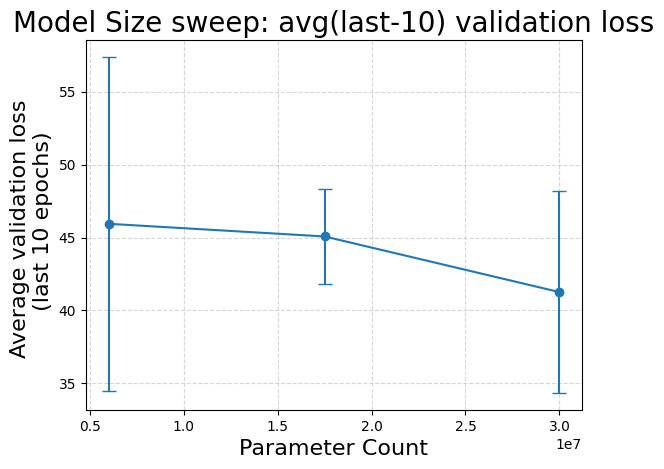

In [45]:
plt.figure()
plt.errorbar(size_vals, avg_losses, std_losses, capsize=5, marker="o")
# plt.xscale("log")           # log scale often makes lrs easier to view
plt.xlabel("Parameter Count", fontsize=16)
plt.ylabel("Average validation loss \n (last 10 epochs)", fontsize=16)
plt.title("Model Size sweep: avg(last-10) validation loss", fontsize=20)
plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig('Size.png',bbox_inches='tight')

   low: events.out.tfevents.1746923672.d0bfc5c1bc33.2888.0
       ↳ avg(last-10 val-loss) = 45.9406
medium: events.out.tfevents.1747324697.355f4e9696ca.18393.0
       ↳ avg(last-10 val-loss) = 45.6981
  high: events.out.tfevents.1747363574.087c5de0c3d5.2987.0
       ↳ avg(last-10 val-loss) = 41.2602


,model,avg_val_loss
0,low,45.940561
1,medium,45.698124
2,high,41.260216


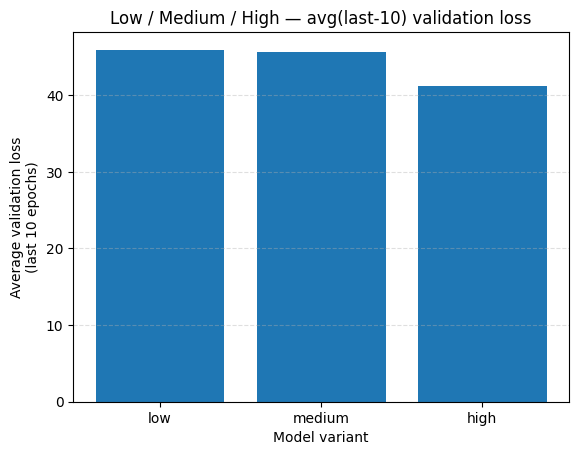

In [ ]:
# ==== Drop-in: LOW / MEDIUM / HIGH model comparison ====

# Point each key to its .tfevents file
events_files = {
    "low":    "/content/drive/MyDrive/CS_4701/peter_low_res/peter_low_res/lightning_logs/version_4/events.out.tfevents.1746923672.d0bfc5c1bc33.2888.0",
    "medium": "/content/drive/MyDrive/CS_4701/peter_new/peter_new/lightning_logs/version_5/events.out.tfevents.1747324697.355f4e9696ca.18393.0",
    "high":   "/content/drive/MyDrive/CS_4701/peter_high/peter_high/lightning_logs/version_2/events.out.tfevents.1747363574.087c5de0c3d5.2987.0",
}

# Quick safety: recreate the helper only if it isn't already defined
try:
    avg_last_10_val_loss
except NameError:
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
    import numpy as np
    def avg_last_10_val_loss(event_file, fallback_tag="val_loss"):
        acc = EventAccumulator(event_file); acc.Reload()
        tag = next((t for t in acc.Tags()["scalars"]
                    if "val" in t.lower() and "loss" in t.lower()),
                   fallback_tag)
        losses = [ev.value for ev in acc.Scalars(tag)]
        return float(np.mean(losses[-10:]))

# Compute the averages
model_names, avg_losses = [], []
for name, path in events_files.items():
    print(f"{name:>6}: {path.split('/')[-1]}")
    avg = avg_last_10_val_loss(path)
    model_names.append(name)
    avg_losses.append(avg)
    print(f"       ↳ avg(last-10 val-loss) = {avg:.4f}")

# Display as a table (optional)
import pandas as pd, matplotlib.pyplot as plt
display(pd.DataFrame({"model": model_names, "avg_val_loss": avg_losses}))

# Plot
plt.figure()
plt.bar(model_names, avg_losses)
plt.xlabel("Model variant")
plt.ylabel("Average validation loss\n(last 10 epochs)")
plt.title("Low / Medium / High — avg(last-10) validation loss")
plt.grid(axis="y", ls="--", alpha=0.4)
plt.show()

,model,params_M,avg_val_loss
0,low,6.0,45.940561
1,medium,17.5,45.698124
2,high,30.0,41.260216


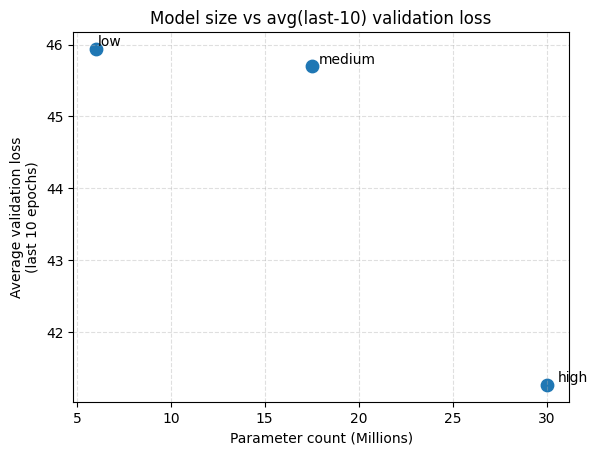

In [ ]:
# ==== Drop-in: parameter count (median of range) vs avg-val-loss ====

# Median parameter counts (M = millions)
param_counts = {
    "low":  6_000_000,   # 5-7 M  → median ≈ 6 M
    "medium": 17_500_000,  # 15-20 M → median ≈ 17.5 M
    "high":   30_000_000,  # 28-32 M → median ≈ 30 M
}

# Build a {model → loss} mapping from the earlier cell
losses_dict = dict(zip(model_names, avg_losses))  # model_names / avg_losses came from the bar-plot cell

# Assemble aligned X (params) and Y (loss) lists
params_M, losses_plot, labels = [], [], []
for name, pcount in param_counts.items():
    if name in losses_dict:           # skip if we didn’t compute loss for that size
        params_M.append(pcount / 1e6) # convert to “millions” for nicer axis ticks
        losses_plot.append(losses_dict[name])
        labels.append(name)

# Quick sanity table (optional)
import pandas as pd, matplotlib.pyplot as plt, numpy as np
display(pd.DataFrame({
    "model": labels,
    "params_M": params_M,
    "avg_val_loss": losses_plot
}))

# Scatter plot
plt.figure()
plt.scatter(params_M, losses_plot, s=80)
for x, y, lbl in zip(params_M, losses_plot, labels):
    plt.text(x * 1.02, y, lbl, va="bottom")  # small offset so text isn’t on top of the point

plt.xlabel("Parameter count (Millions)")
plt.ylabel("Average validation loss\n(last 10 epochs)")
plt.title("Model size vs avg(last-10) validation loss")
plt.grid(True, ls="--", alpha=0.4)
plt.show()
